# Bài 9: Review statistics - Part 1

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")

## 1. Classification of data types
- **Qualitative (categorical):**
    - Nominal (Name): 
        - Example: name, sex, nationality, ...
        - Characteristics:
            - Just labels
            - No natural order
            - Cannot perform math operations
        - Special case: binary (0/1 or Y/N or T/F)
    - Ordinal:
        - Example: letter grades (A, B, C, D, F), satisfaction, ...
        - Characteristics:
            - Just labels, but has natural order
            - Distances between classes are not defined
            - Cannot perform math operations
            
- **Quantitative (numerical):**
    - Discrete:
        - Example: number of children, number of diplomas
        - Characteristics:
            - Can take integer values such as counts
            - Have relatively small number of possible values (if too many, then treat as continuous)
            - Have order, distances are defined
            - Can perform math operations
        
    - Continuous:
        - Example: salary, income, age, years of experience, driving speed...
        - Characteristics:
            - Can take any values in an interval
            - Have order, distances are defined
            - Can perform math operations
            - Some discrete data are better modeled as continuous if their number of possible values are too large (e.g. number of seat on a airplane, population, ...)

## 2. Why care about data types
They determine 
- How we look at the data (hist, bar, scatter, contingency tables, ...)
- What kinds of operations we can perform on them (count, math operations, ...)
- What kind of actions we should perform on them (binning, ...)
- What kinds of models to use (regression, classification, ...)

## 3. Tabular data
- **Data frame:** 
    - Rectangular table (like Excel spreadsheet)
    - Most ML models expect retangular format
    
- **Features:**
    - Features are often expressed as columns (sex, age, income, education, ...)
    - Features are characteristics of interest 
    - Synonym: attributes, predictors, input, indenpendent variables, columns

    
- **Target:**
    - Target is the characteristic that we want to predict (e.g. income, age, good/bad, ...)
    - Often target is expressed as a column
    - Synonym: outcome, response, output, dependent variable
    
- **Observations:**
    - Observation are often expressed as rows 
    - Synonym: records, cases, instances, sample, row
    


## 4. Examples

### Load and inspect data

In [2]:
# Load
tips = sns.load_dataset("tips")

In [3]:
# Shape
tips.shape

(244, 7)

In [4]:
# Head
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### VD1: Phân loại:
- `tota_bill, tip`: Quantitative > continuous
- `smoker, time, day`: Qualitative > Nominal
- `size`: Qualitative > Discrete

In [5]:
# Check dtypes
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### VD2: Example scenario

- Target: 
    - `tip`: continuous (predict how much tip) basing on other features
    
- Features: other columns
    - `total_bill`: continuous
    - `smoker`: nominal (binary)
    - `day`: nominal 
    - `time`: nominal (binary)
    - `size`: discrete
    
- Observation: 
    - Each row (each meal at a restaurant)

## 5. Distributions
- Distribution is just a term for how data are distributed (how data points are located)
- Will understand more in the next sections

In [6]:
# Distribution of smoker (absolute count)
tips["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [7]:
# Distribution of smoker (relative count)
tips["smoker"].value_counts(normalize=True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

## 6. Work with categorical data

### 6.1. Important summary stats
- Mode: the most common category
- Somehow can be thought of the *center* of the distribution (although not exactly)

In [8]:
# View
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [9]:
# Find mode of day
# Note: Mode is Sat, not 87
tips["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [10]:
# Find mode of sex
# Note: Mode is Male, not 157
tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [11]:
# Find mode of time
# Note: Mode is Dinner, not 176
tips["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

### 6.2. Characterize categorical distributions
- For categorical data, what we want to display the magnitude of each class:
    - Count (absolute count, e.g: 120)
    - Percentage (relative count, e.g: 30%)
    - Proportion (just percentage in decimal form, e.g: 0.3) 
    
- Common tools:
    - Table: 
        - Frequency tables (3 types for count, percentage, and proportion)
        - A tally of the count of data values that fall into a category
        - Suitable for data with small numbers of distinct values (ideal for qualitative data)
        - For continuous data, should apply binning the data first (as we will see later)

    - Plot:
        - Bar charts (mỗi bar là một class, chiều cao của bar là magnitude của class đó)
        - Pie charts (not recommended)
        - Bar charts and pie charts are just graphical representations of frequency tables

#### A1) Frequency tables (absolute count)

In [12]:
# Series form
tips["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [13]:
# DataFrame form
tips["day"].value_counts().reset_index()

,index,day
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


#### A2) Frequency tables (Proportion)

In [14]:
# Series form
tips["day"].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

In [15]:
# DataFrame form
tips["day"].value_counts(normalize=True).reset_index()

,index,day
0,Sat,0.356557
1,Sun,0.311475
2,Thur,0.254098
3,Fri,0.077869


#### A3) Frequency tables (Percentage)

In [16]:
# Series form
tips["day"].value_counts(normalize=True) * 100

Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64

In [17]:
# DataFrame form
(tips["day"].value_counts(normalize=True) * 100).reset_index()

,index,day
0,Sat,35.655738
1,Sun,31.147541
2,Thur,25.409836
3,Fri,7.786885


#### B1) Barchart (absolute count)

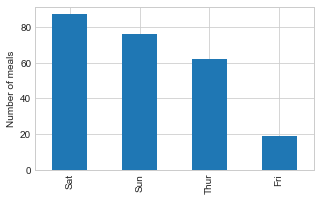

In [18]:
# Prepare data
data = tips["day"].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
data.plot.bar(ax=ax) # Try with barh
ax.set_ylabel("Number of meals")
plt.show()

#### B2) Barchart (proportion)

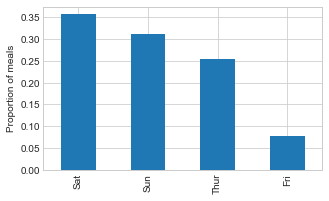

In [19]:
# Prepare data
data = tips["day"].value_counts(normalize=True)

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
data.plot.bar(ax=ax) # Try with barh
ax.set_ylabel("Proportion of meals")
plt.show()

#### B3) Barchart (percentage)

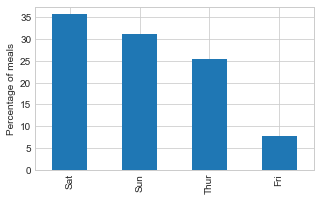

In [20]:
# Prepare data
data = tips["day"].value_counts(normalize=True) * 100

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
data.plot.bar(ax=ax) # Try with barh
ax.set_ylabel("Percentage of meals")
plt.show()

#### C1) Piechart
- Absolute count, proportion, percentage cho ra same plot (vì bản chất pie chart dùng để biểu thị part-to-whole), tức mỗi slice sẽ tương ứng với tỉ lệ % của cả pie.
- Không nên dùng pie chart: 
    - Vì mắt người khó phân biệt được sự khác biệt giữa các pie (đặc biệt các pie có độ lớn xấp xỉ nhau)
    - Dễ tra giá trị trên trục tham chiếu
- Nên dùng bar chart thay vì pie chart

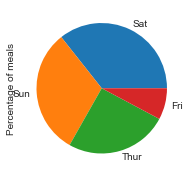

In [21]:
# Prepare data
data = tips["day"].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
data.plot.pie(ax=ax) # Try with barh
ax.set_ylabel("Percentage of meals")
plt.show()

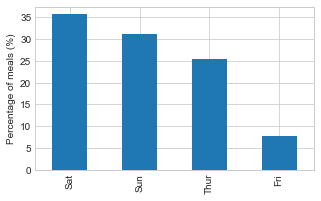

In [22]:
# Prepare data
data = tips["day"].value_counts(normalize=True) * 100

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
data.plot.bar(ax=ax) # Try with barh
ax.set_ylabel("Percentage of meals (%)")
plt.show()

#### D) Practice with other categorical variables

In [23]:
# View
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


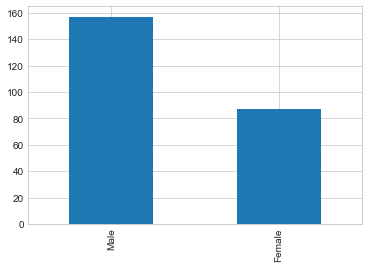

In [24]:
# Sex
tips["sex"].value_counts().plot.bar()
plt.show()

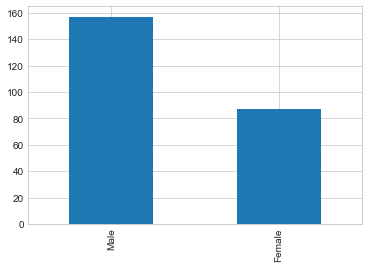

In [25]:
# Sex
tips["sex"].value_counts().plot.bar()
plt.show()

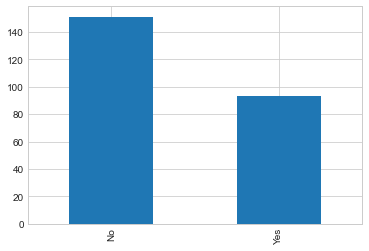

In [26]:
# Smoker
tips["smoker"].value_counts().plot.bar()
plt.show()

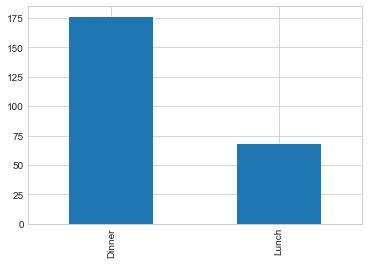

In [27]:
# Time
tips["time"].value_counts().plot.bar()
plt.show()

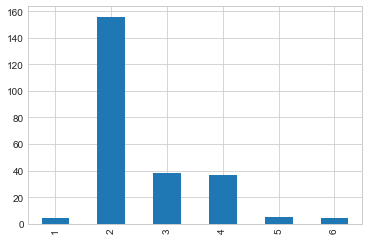

In [28]:
# Size
tips["size"].value_counts().sort_index().plot.bar()
plt.show()

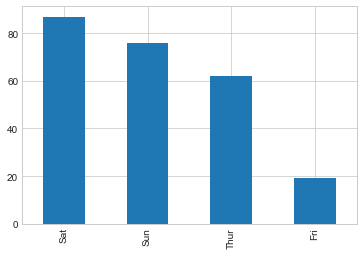

In [29]:
# Compare with bar chart
tips["day"].value_counts().plot.bar()
plt.show()

## 7. Continuous data

### 7.1. Important summary statistics
- Measures of location
    - Mean (mean, trimmed mean)
    - Median
    - Percentiles, quantiles
    
- Measures of variabiliy
    - Range
    - IQR
    - Variance
    - Standard deviation

In [30]:
# View data
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


#### 7.1.1. Measures of location

##### A. Mean
- Middle value (center of gravity) where all the data points center around.
- Formula: 
    - The sum of all values divided by the number of values
    - $\frac{1}{m}\Sigma_i^m x_i$
- Synonym: arithmetic average

In [31]:
# Cách 1
tips["tip"].mean()

2.9982786885245902

In [32]:
# Cách 2
np.mean(tips["tip"])

2.9982786885245902

##### Practice

In [33]:
# Số người trung bình mỗi bữa ăn?


In [34]:
# Total bill trung binh mỗi bữa ăn?


##### B. Trimmed mean
- The average of all values after dropping a fixed number of extreme values (at two ends)
- Why: to make the measure more robust to outliers
- Synonym: truncated mean 
- Related terms:
    - Outlier: 
        - A data value that is very different from most of the data
        - Synonym: extreme value
    - Robust: 
        - Not sensitive to extreme values.
        - Synonym: resistant

In [35]:
# Giả lập data
salaries = sorted([14, 14, 15, 20, 25, 26, 27, 27, 29, 30, 35, 40, 10, 32, 21, 17, 18, 20])
salaries_2 = sorted(salaries + [800, 900])

In [36]:
# View
print(salaries)
print(salaries_2)

[10, 14, 14, 15, 17, 18, 20, 20, 21, 25, 26, 27, 27, 29, 30, 32, 35, 40]
[10, 14, 14, 15, 17, 18, 20, 20, 21, 25, 26, 27, 27, 29, 30, 32, 35, 40, 800, 900]


- Normal mean

In [37]:
print(np.mean(salaries))
print(np.mean(salaries_2))

23.333333333333332
106.0


- 10%-trimmed mean

In [38]:
import scipy # Scientific python

In [39]:
scipy.stats.trim_mean(salaries, 0.1)

23.125

In [40]:
scipy.stats.trim_mean(salaries_2, 0.1)

24.75

##### C. Median
- Middle value where 1/2 of the data point lie below (and above) it. (sorted data)
- Synonym: 50 percentile
- More robust to outliers than mean

In [41]:
np.median(salaries)

23.0

In [42]:
np.median(salaries_2)

25.5

##### D. Percentiles
- The value such that P percent of the values take on this value or less and (100–P) percent take on this value or more.
- Ranging from 0 to 100
- Related terms:
    - Quantile: Percentile expressed in decimal (ranging from 0 to 1). E.g: 0.1 quantile is the same as 10th percentile

In [43]:
# Sort data
tips["tip"].sort_values()

67      1.00
236     1.00
92      1.00
111     1.00
0       1.01
       ...  
141     6.70
59      6.73
23      7.58
212     9.00
170    10.00
Name: tip, Length: 244, dtype: float64

In [44]:
# Quantiles
# 0: min
# 0.1: 10%
# 0.5: 50% (median)
# 0.9: 90%
# 1: max
np.quantile(tips["tip"], [0, 0.1, 0.5, 0.9, 1.])

array([ 1. ,  1.5,  2.9,  5. , 10. ])

In [45]:
# Percentiles
# 0: min
# 10: 10%
# 50: 50% (median)
# 90: 90%
# 100: max
np.percentile(tips["tip"], [0, 10, 50, 90, 100])

array([ 1. ,  1.5,  2.9,  5. , 10. ])

 - Middle: mean, median
 - Percentile, quantile

##### E) Quartiles
- First quartile (Q1): 25th percentile
- Second quartile: Median
- Third quartile (Q2): 75th percentile

In [46]:
# Q1
np.quantile(tips["tip"], 0.25)

2.0

In [47]:
# Q3
np.quantile(tips["tip"], 0.75)

3.5624999999999996

#### 7.1.2. Measures of variability

##### A) Variance

- First we need to introduce the concept of ***deviation***
- ***deviation***: The difference between a value and a refrence value
- Synonym: difference, residual

In [48]:
# Giả lập data
df = tips.loc[:, ["tip"]].copy()

# Export to excel
df.to_excel("deviation.xlsx", index=False)

In [49]:
# View
df.head(3)

,tip
0,1.01
1,1.66
2,3.50


Mở file excel `deviation.xlsx` vừa export và làm theo hướng dẫn:
    
1. Tạo 1 cell là mean của cột `tip`
1. Tạo cột `tip_diff` cạnh cột `tip` bằng cách lấy cột `tip` trừ đi cell `mean` vừa tính được
1. Tạo cột `tip_diff_2` là square của `tip_diff`
1. Tạo 1 cell tính mean của cột `tip_diff_2` -> Kết quả: `1.906608512`
1. Kết quả trên chính là variance: $\frac{1}{n - 1}\Sigma(x_i - \bar{x})^2$

Ý nghĩa của variance:

1. Trường hợp lý tưởng: tất cả các meal đều có tiền tip là 1 USD
    - => mean = 1 
    - => tất cả deviation = 0
    - => tất cả square của deviation = 0
    - => sum of square of deviations = 0
    - => variance = 0
    - Tức không có variation giữa các observation, nói cách khác: các data points hoàn toàn đồng nhất về khía cạnh tiền tip
    
1. Trong thực tế, các bữa ăn khác nhau thông thường sẽ có giá trị tip khác nhau:
    - => từng giá trị tip riêng lẻ sẽ khác mean
    - => các deviation sẽ khác 0
    - => square of deviation sẽ là số dương
    - => sum of square of deviations sẽ là một số dương. Các deviation đơn lẻ có giá trị càng lớn thì dẫn đến sum này càng lớn
    - => variance là số dương
    - Variance càng lớn thể hiện data càng không đồng nhất, tức: 
        - a) càng có nhiều data points lệch ra khỏi mean
        - b) có data points lệch xa khỏi mean
        - c) hoặc cả a và b
        
    - Vì vậy variance dùng để phản ánh mức độ không đồng nhất của data
    - Data càng đồng nhất (var nhỏ) thì distribution càng ốm (thin/slim)
    - Data  càng không đồng nhất (var lớn) thì distribution càng mập (fat)

In [50]:
# Lặp lại thao tác với excel ở trên, dùng pandas
# Tiện lợi hơn, không phải tạo cột phụ, cell phụ
np.mean((df["tip"] - df["tip"].mean()) ** 2)

1.9066085124966428

In [51]:
# Thực tế dùng .var()
# Số sẽ lệch 1 chút vì sample variance chia cho N-1, không phải N
# Tuy nhiên ko quan trọng
df["tip"].var()

1.9144546380624725

#### B. Standard deviation
- The square root of the variance (same unit as the variable)
- Gives a sense of how far away the data points are from the mean
- High SD: fat-looking, data more spreadout, more diverse
- Low SD: thin-looking, data more concentrated, more homogenous
- Normal distribution: `68–95–99.7 rule`

In [52]:
# Square root of var
np.sqrt(tips["tip"].var())

1.3836381890011826

In [53]:
# STD
tips["tip"].std()

1.3836381890011826

#### C. Range
- The difference between the largest and the smallest value in a data set.

In [54]:
# Range of tip
tips["tip"].max() -tips["tip"].min()

9.0

#### D. Inter-Quartile Range (IQR)
- The difference between the 75th percentile and the 25th percentile.
- Just two ends that cover the middle half of the data.
- Gives a sense of how the middle half of the data spread out
- Why:
    - Giảm thiểu ảnh hưởng của outlier
    - Tương tự như trimmed mean

```
MIN ---------- Q1 ---------- MEDIAN ---------- Q3 ---------- MAX
|--------------|================================| -------------|
```

In [55]:
# Cách 1
q1, q3 = np.quantile(tips["tip"], [.25, .75])
q3 - q1

1.5624999999999996

In [56]:
# Cach 2
scipy.stats.iqr(tips["tip"])

1.5624999999999996

##### E) Quickly display summary statistics

In [57]:
# For Series
df["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [58]:
# For DataFrame
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### 7.2. Characterize continuous distributions

- **Tables:**
    - Binned frequency table
    
- **Plots:**
    - Histogram (cloned version bar chart for continuous data)
    - KDEs (smooth form of histogram)
    - Box plots

##### A1. (Binned) Frequency tables
- Should not tally every single values (just to many)
- For continuous data, should apply binning the data first
- The action is called binning or discretizing (making continuous data become categorical data)

In [59]:
# View data
tips["tip"] # Contious -> categorical: discretize

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [60]:
# Cut data
tips_cut = pd.cut(tips["tip"], 10, right=False).value_counts().sort_index()

In [61]:
# Binned frequency table
tips_cut

[1.0, 1.9)       41
[1.9, 2.8)       79
[2.8, 3.7)       66
[3.7, 4.6)       27
[4.6, 5.5)       19
[5.5, 6.4)        5
[6.4, 7.3)        4
[7.3, 8.2)        1
[8.2, 9.1)        1
[9.1, 10.009)     1
Name: tip, dtype: int64

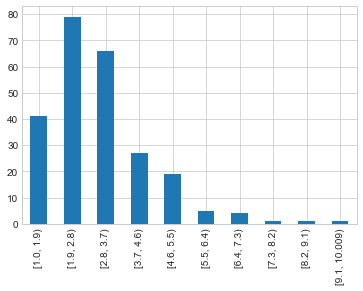

In [62]:
# Plot bar chart
tips_cut.sort_index().plot.bar()
plt.show()

##### B1. Histogram
- Just a cloned version of barchart (above) for continuous data
- Firts, we bin the data into bins with equal width
- The treat each bin as a category, but consecutive (right order, no gap between bars)
- The emphasis is **CONTINUOUS**
- If the is a gap, it means there is an empty bin

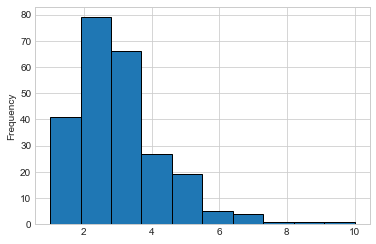

In [63]:
# Plot histogram
fig, ax = plt.subplots()
tips["tip"].plot.hist(bins=10, edgecolor="black", ax=ax)
plt.show()

##### B2. Kernel Density Estimate (KDE)
- Can be thought of a *smooth histogram*
- Represent the true underlying hypothetical distribution that generates the data (i.e. if we were obtain *all* the data points of the distribution, we would get the KDE, which is impossible in practice)

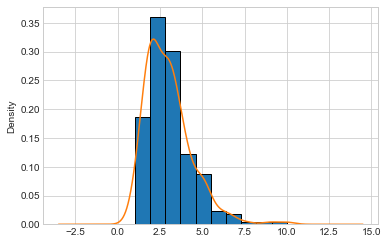

In [64]:
# Plot KDE and histogram on the same Axes
# Must set density=True to plot normalized historgram (not absolute)
fig, ax = plt.subplots()

tips["tip"].plot.hist(bins=10, density=True, edgecolor="black", ax=ax)
tips["tip"].plot.kde(ax=ax)
plt.show()

##### B3. Boxplot (box-and-whisker plot)
- A concise way of visualizing five-number summary in a single plot
- Five-number summary: min, q1, median, q3, maximum
- Component of the boxplot:
    - Lowest value: minimum
    - Highest value: maximum
    - Lower edge of the box: q1
    - Upper edge of the box: q3
    - Circles: suspected outliers
        - 1.5IQR up away from q3
        - 1.5IQR down away from q1
    - Vertical lines from the box: whiskers
    - Horizontal lines at the end of the whiskers
        - If has outliers: q1 - 1.5IQR and q3 + 1.5IQR
        - If has no outliers: min and max
    - The box: half of the data in the middle

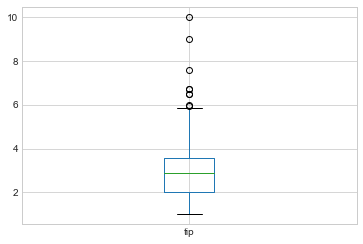

In [65]:
# Boxplot for all data points
tips["tip"].plot.box()
plt.show()

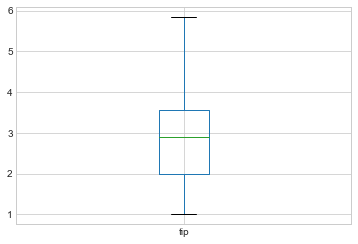

In [66]:
# Boxplot removed outliers
tips["tip"].plot.box(showfliers=False)
plt.show()

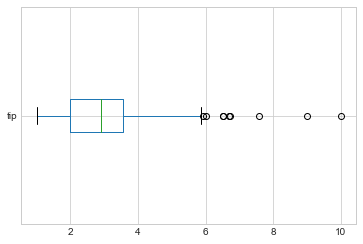

In [67]:
# Horizontal boxplot
tips["tip"].plot.box(vert=False)
plt.show()